In [18]:
from openforcefield.topology import Molecule
import qcengine
import qcelemental as qcel
from qcelemental.models import AtomicInput
from qcelemental.models.common_models import Model
from openeye import oequacpac, oechem, oeomega

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pickle

In [19]:
data = None
# loading pickle file
with open('xtb_am1_benchmark.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [20]:
mols = list(data.keys())

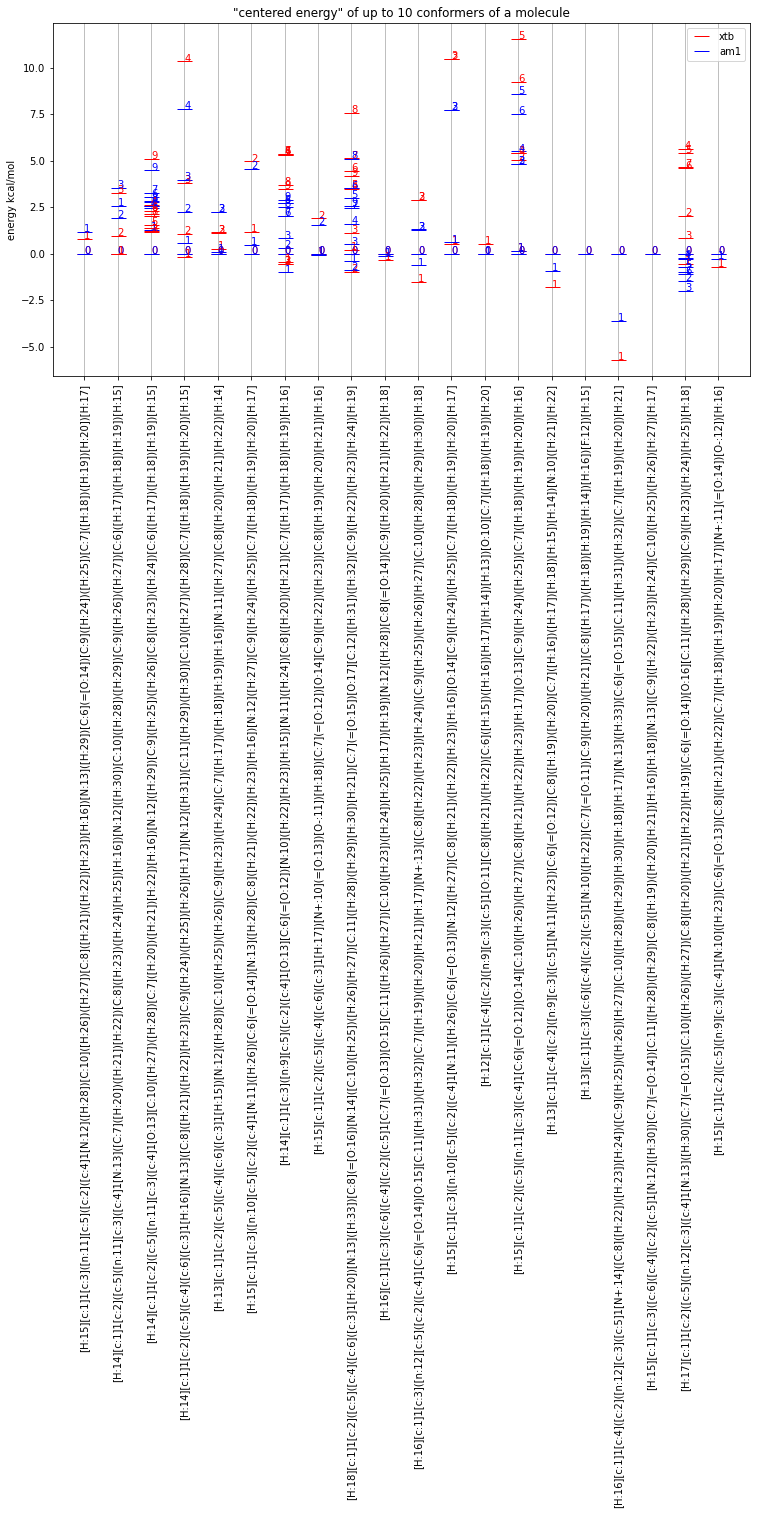

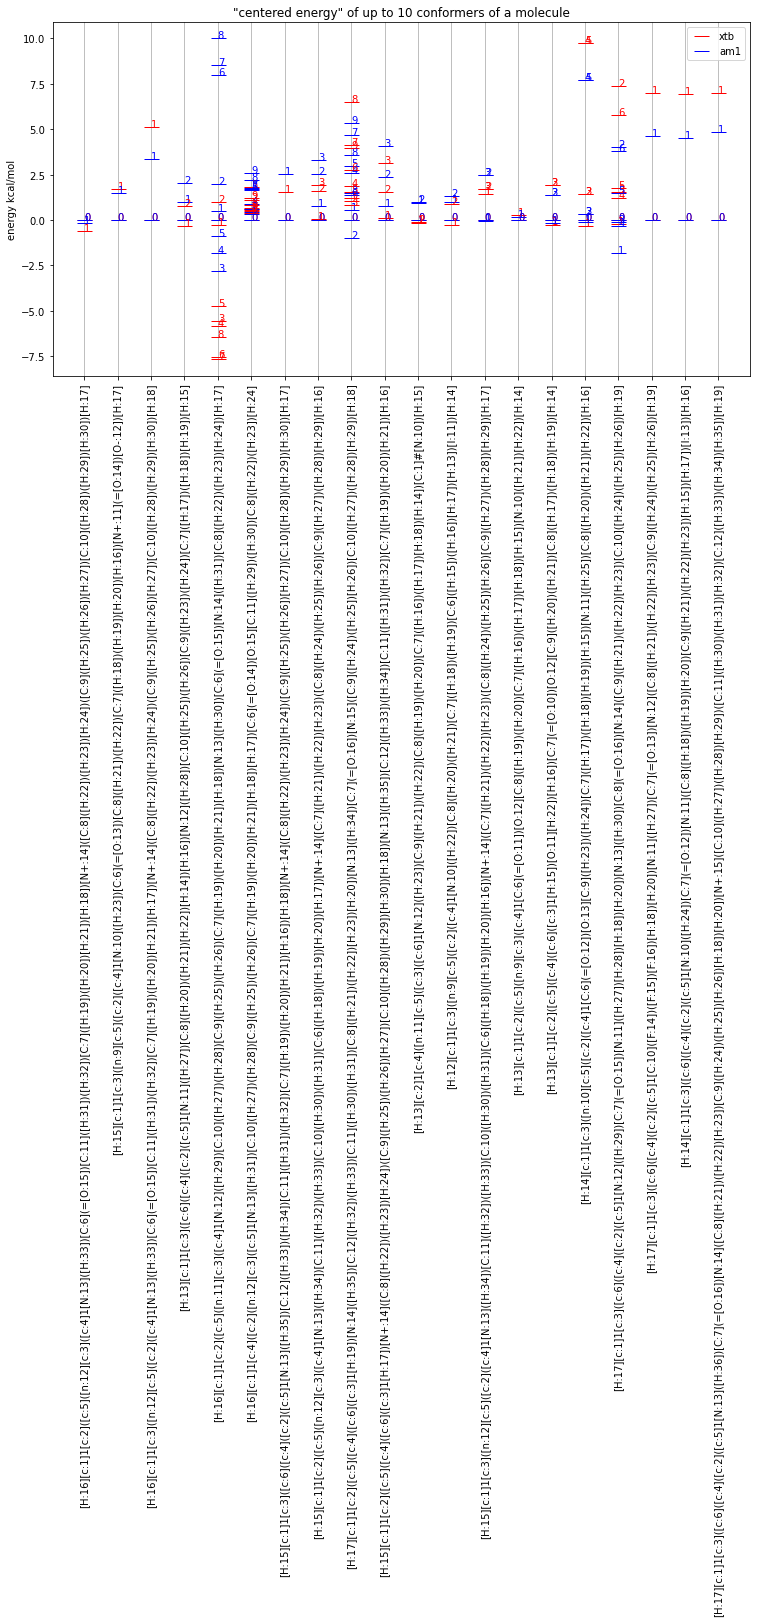

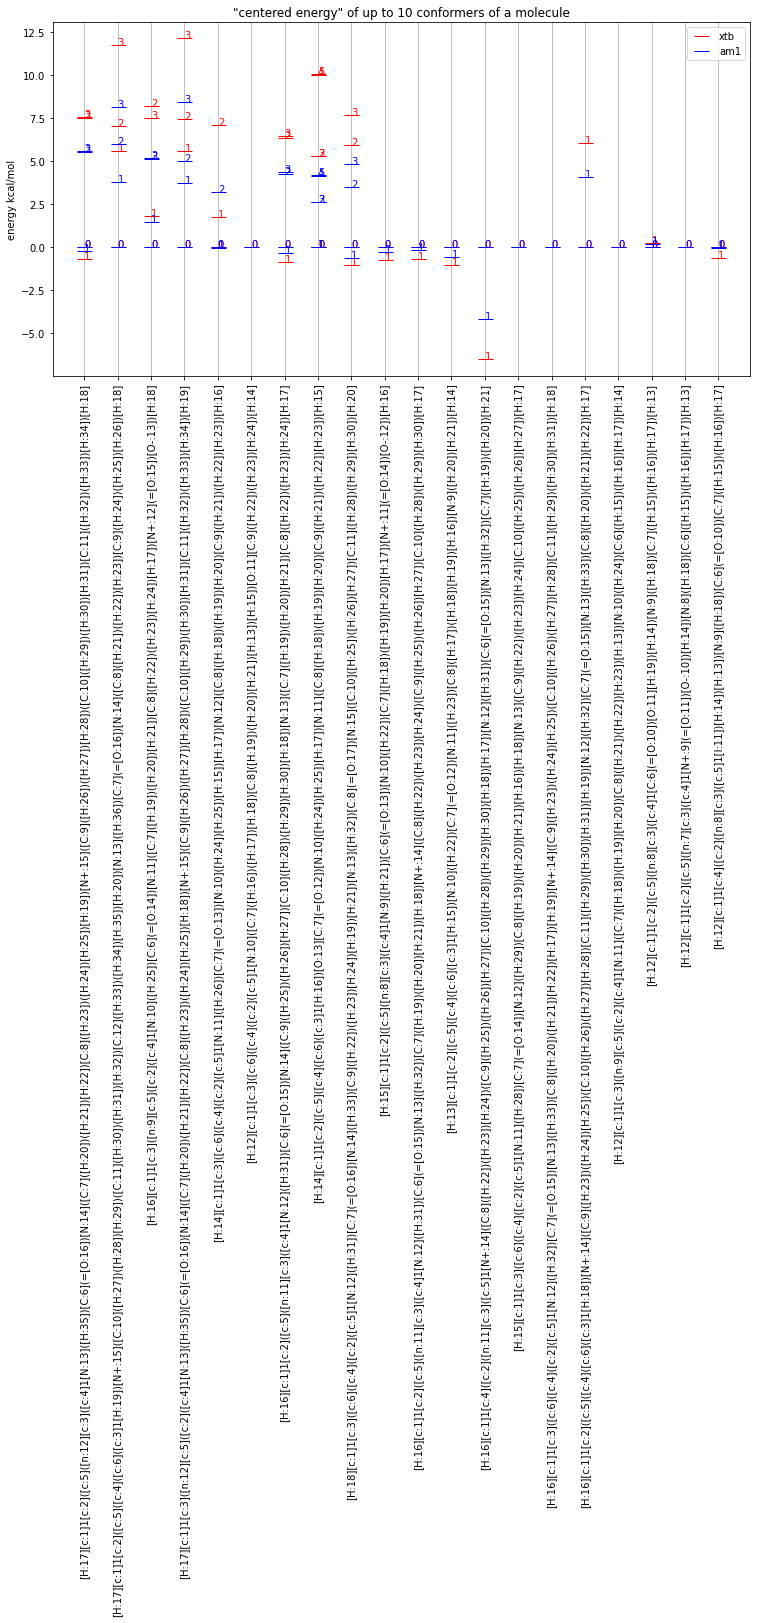

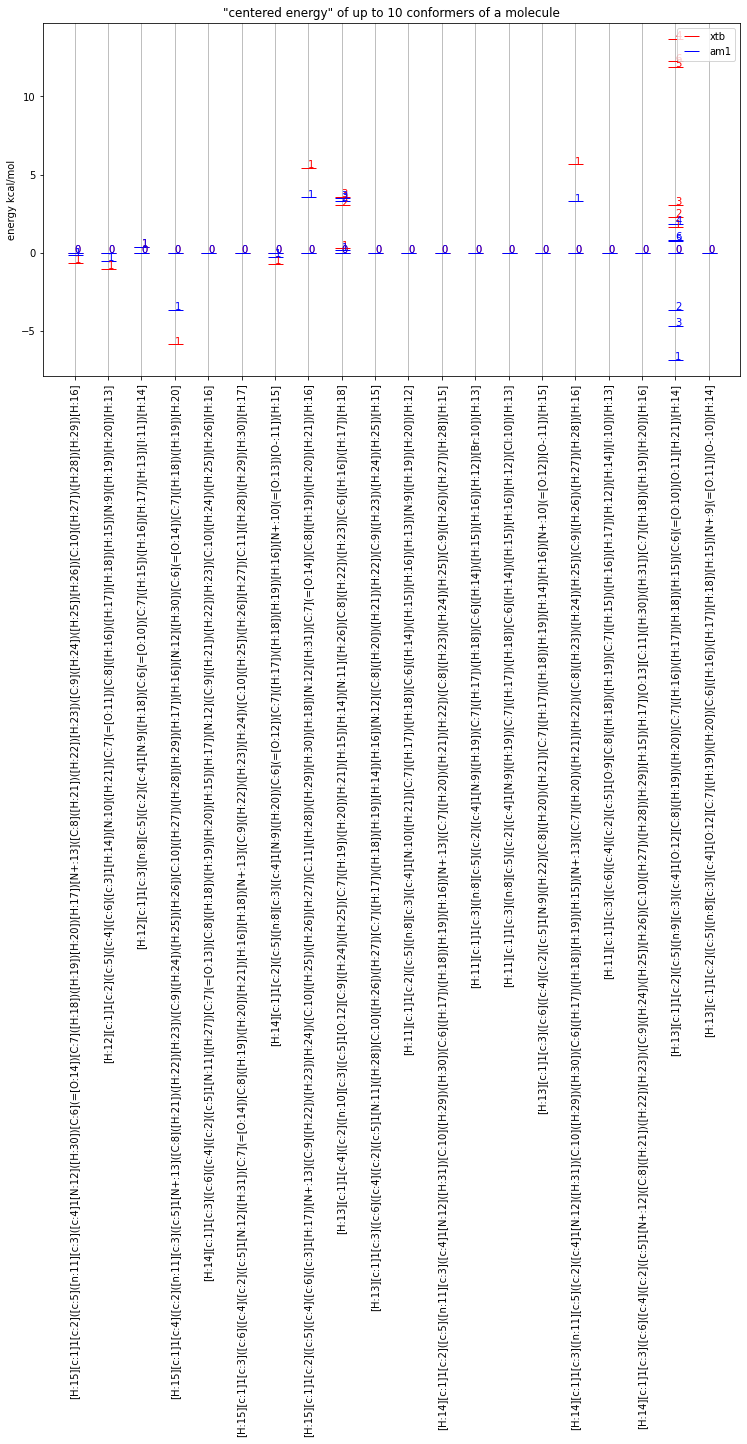

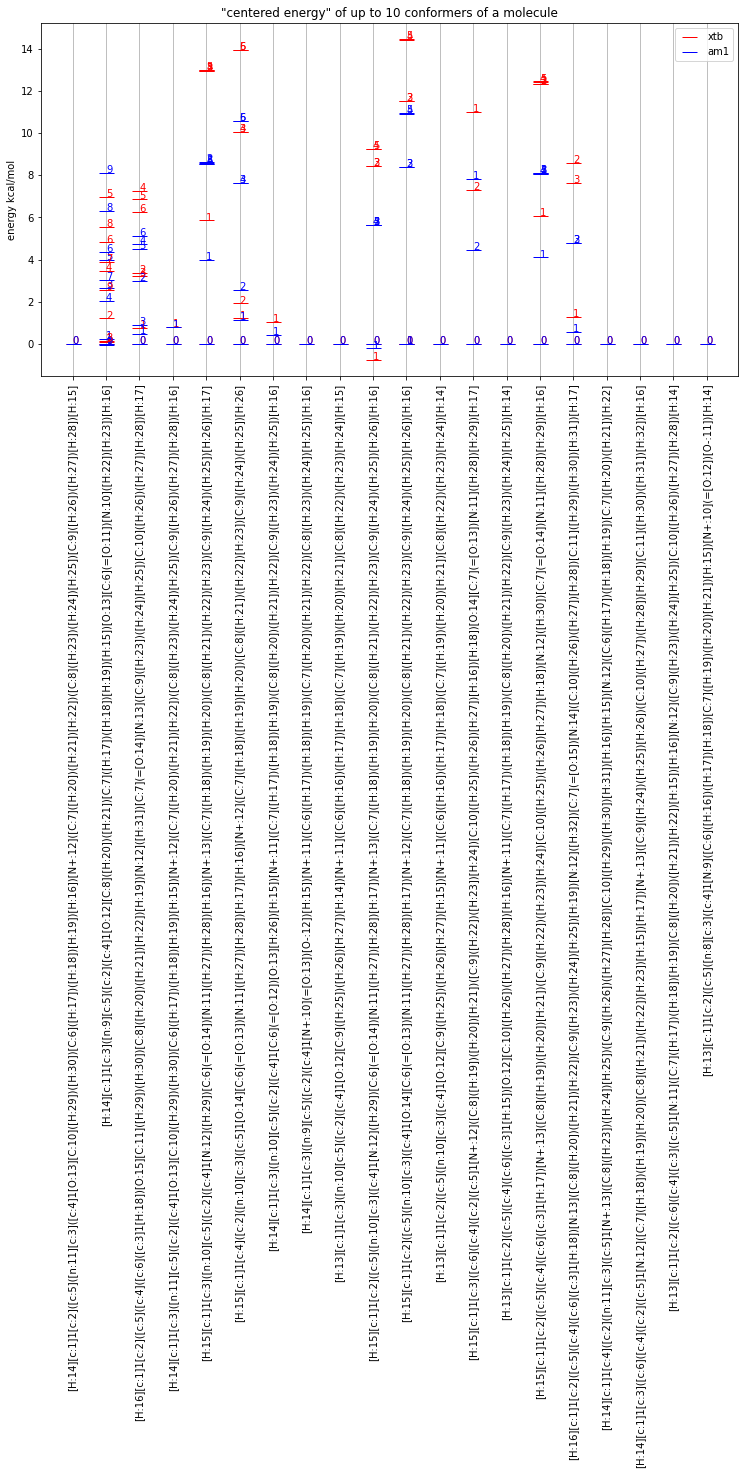

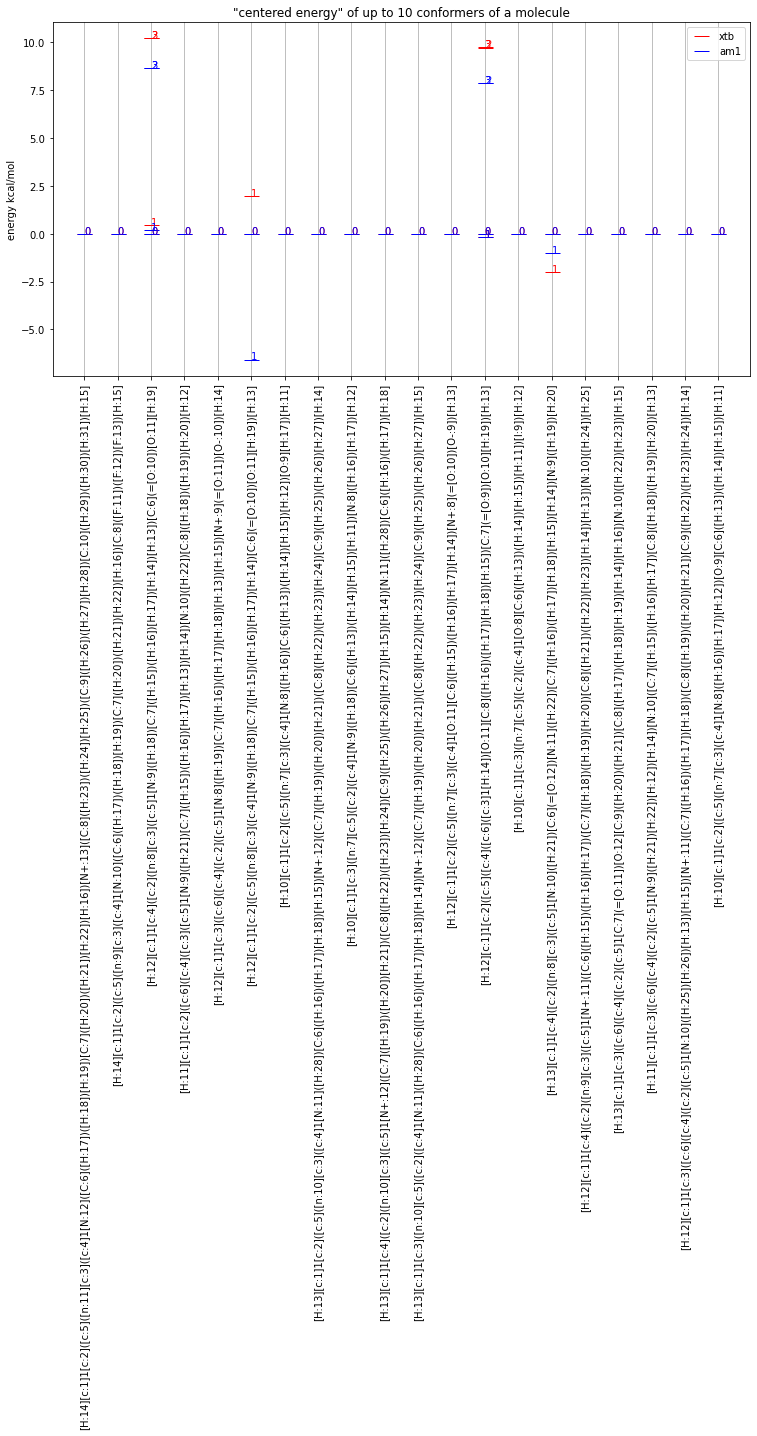

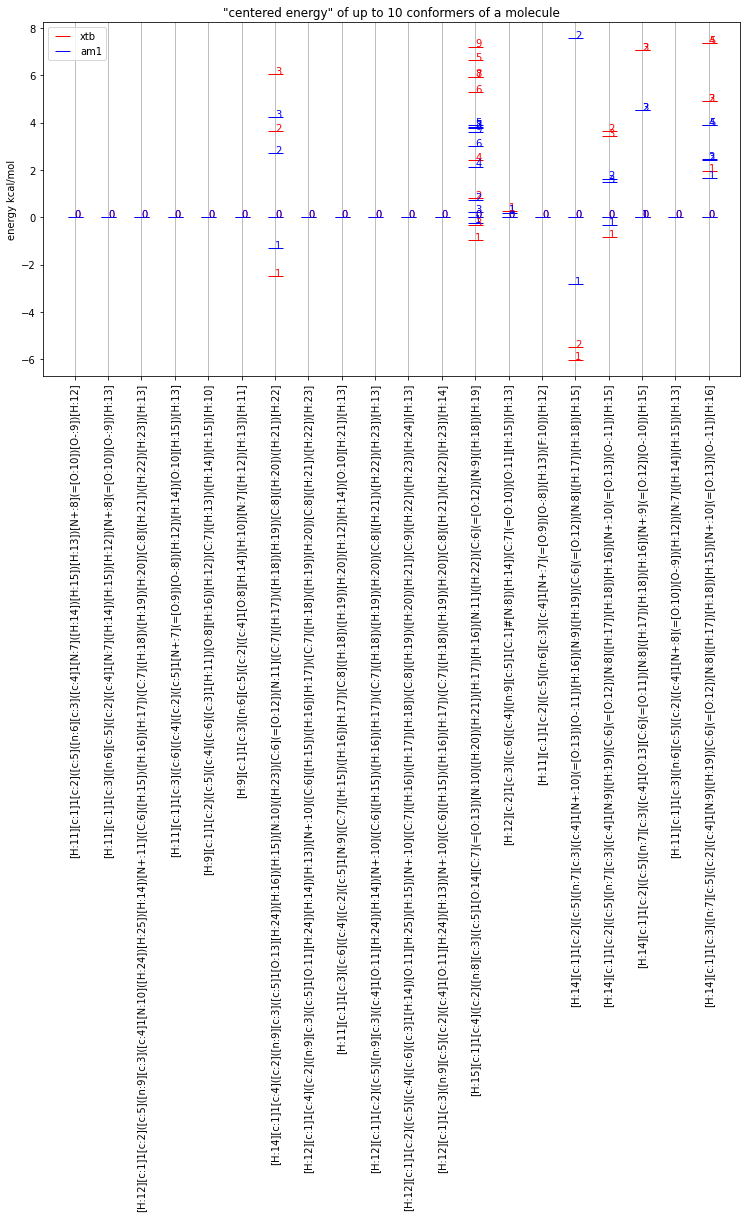

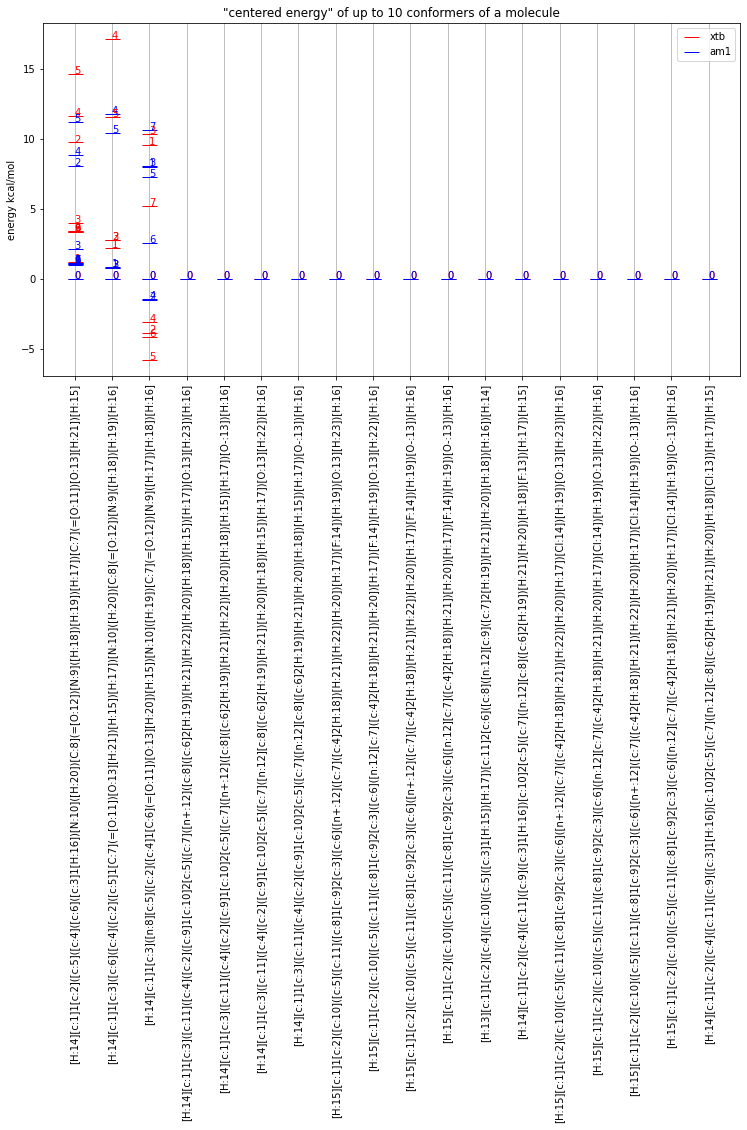

In [24]:
for i in range(int(np.ceil(len(mols)/20))):
    idxs = np.arange(i*20, min(len(mols), (i+1)*20) )
    for confidx in range(10):
        for ii in idxs:
            name = mols[ii]
            mol_info = data[name]
            try:
                aa, = plt.plot(name, mol_info["xtb_centered"][confidx], color="red", marker="_", markersize=15, linestyle="None")
                ab, = plt.plot(name, mol_info["am1_centered"][confidx], color="blue", marker="_", markersize=15, linestyle="None")
                plt.text(name, mol_info["xtb_centered"][confidx], str(confidx), color="red")
                plt.text(name, mol_info["am1_centered"][confidx], str(confidx), color="blue")
            except IndexError:
                pass

    plt.legend((aa, ab), ("xtb", "am1"))
    plt.title("\"centered energy\" of up to 10 conformers of a molecule")
    plt.ylabel("energy kcal/mol")
    plt.xticks(rotation=90)
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    plt.grid(axis="x")
    plt.show()